In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier


df=pd.read_csv("gender_submission.csv")
df
original_df = pd.read_csv('gender_submission.csv')

In [4]:
df=pd.read_csv("test.csv")
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
df=pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<Axes: >

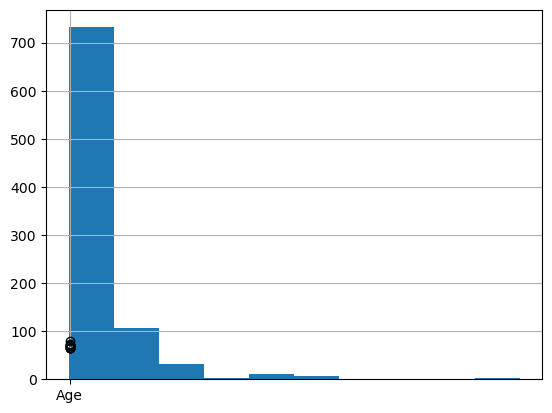

In [6]:
df.isnull().sum()
df['Sex'].value_counts()
df['Embarked'].value_counts()
df.describe()
df['Age'].plot(kind='box')
df['Fare'].hist()


In [126]:
nan_indices = np.isnan(X_train).any(axis=1)

X_train = X_train[~nan_indices]
Y_train = Y_train[~nan_indices]




In [134]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

X_train = imputer.fit_transform(X_train)


In [11]:
df.head()
df.info()

df['PassengerId'].unique()

df['PassengerId'].value_counts()

df['PassengerId'].unique()
df['PassengerId'].replace({'Incorrect_Value': 'Correct_Value'}, inplace=True)
df['PassengerId'] = df['PassengerId']
df['PassengerId'] = df['PassengerId']

df['PassengerId'] = df['PassengerId'].astype('int')
df['PassengerId'].unique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [ ]:
How can we visualize the survival rate of passengers based on different variables such as age, gender, and socio-economic class?

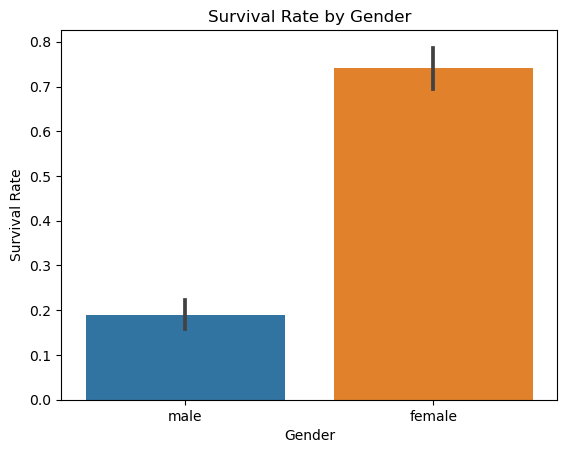

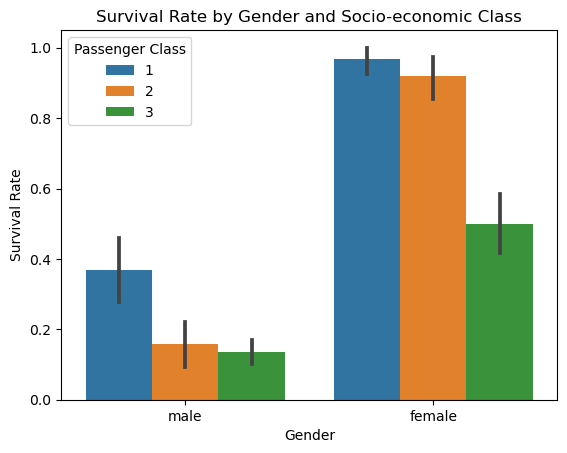

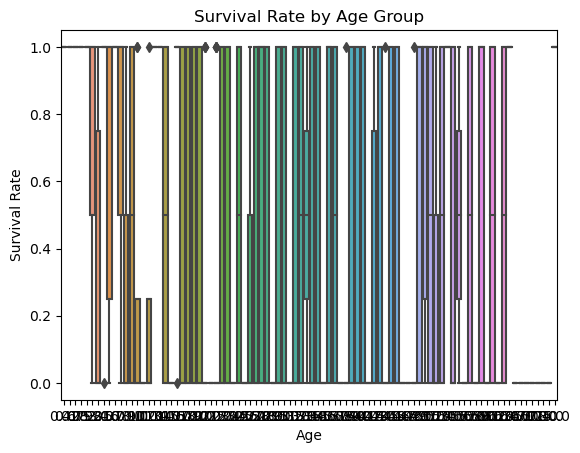

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Sex', y='Survived', data=df)
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Gender')
plt.show()

sns.barplot(x='Sex', y='Survived', hue='Pclass', data=df)
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Gender and Socio-economic Class')
plt.legend(title='Passenger Class')
plt.show()

sns.boxplot(x='Age', y='Survived', data=df)
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Age Group')
plt.show()


In [ ]:
Can we create visualizations to understand the relationship between different passenger characteristics (e.g., age, class) and survival?

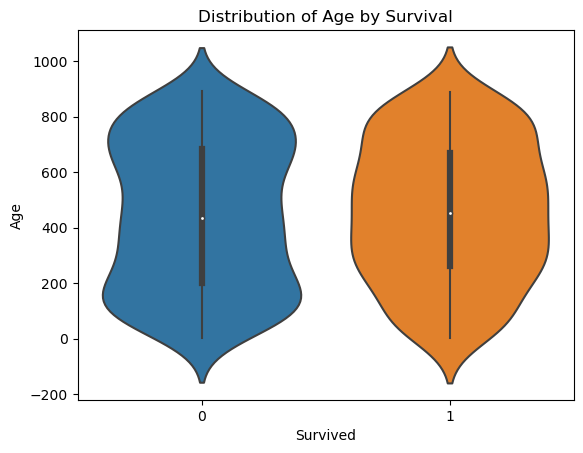

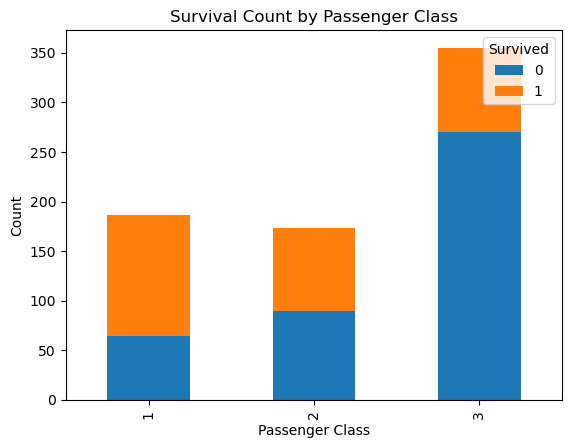

/var/folders/6b/z0zq_5nn4yz8p0rkffc_4g8r0000gn/T/ipykernel_79781/159084127.py:24: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


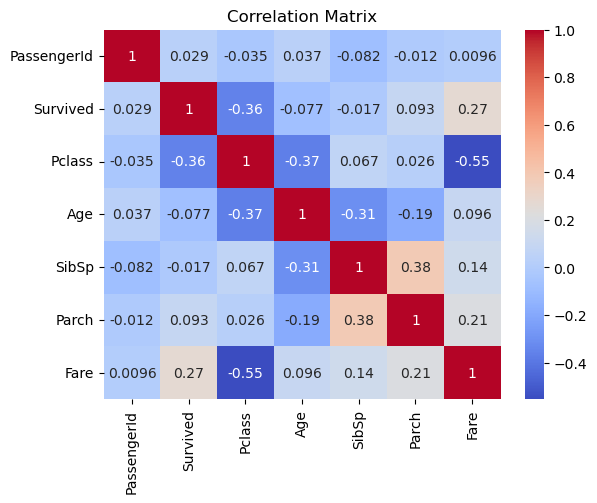

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt
train_df.head

sns.violinplot(x='Survived', y='PassengerId', data=df)
plt.xlabel('Survived')
plt.ylabel('Age')
plt.title('Distribution of Age by Survival')
plt.show()


survival_by_class = df.groupby(['Pclass', 'Survived']).size().unstack()
survival_by_class.plot(kind='bar', stacked=True)
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Survival Count by Passenger Class')
plt.legend(title='Survived', loc='upper right')
plt.show()


import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [148]:
How can we visualize the distribution of different variables (e.g., age, fare) to identify any patterns or outliers?

Object `outliers` not found.


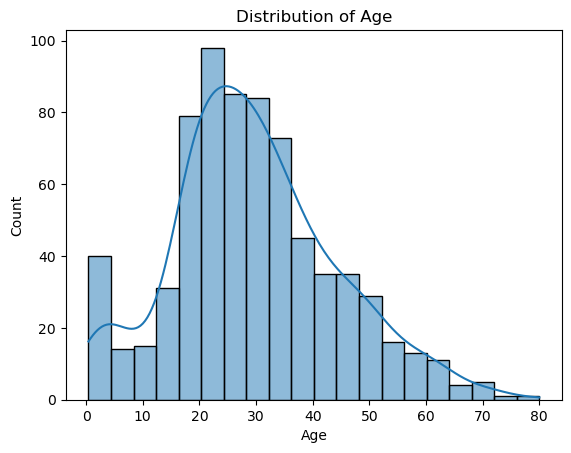

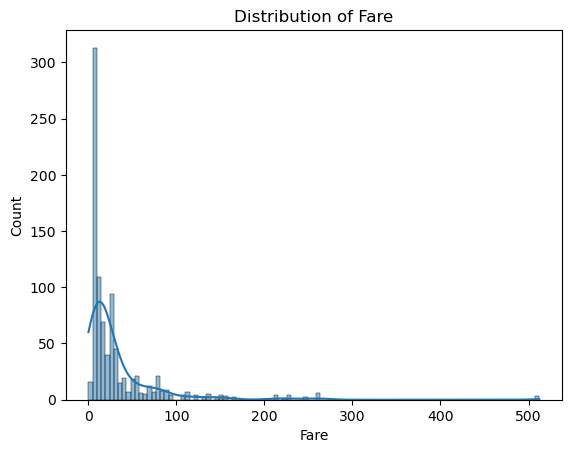

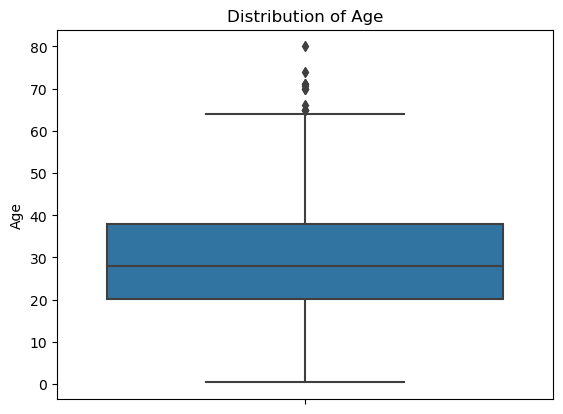

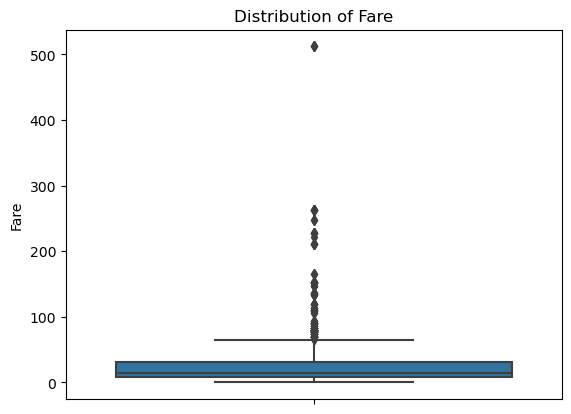

In [16]:
sns.histplot(df['Age'], kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

sns.histplot(df['Fare'], kde=True)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Distribution of Fare')
plt.show()


sns.boxplot(y='Age', data=df)
plt.ylabel('Age')
plt.title('Distribution of Age')
plt.show()

sns.boxplot(y='Fare', data=df)
plt.ylabel('Fare')
plt.title('Distribution of Fare')
plt.show()


In [ ]:
Can we visualize the distribution of survivors and non-survivors based on different variables to gain insights into the factors that influenced survival?

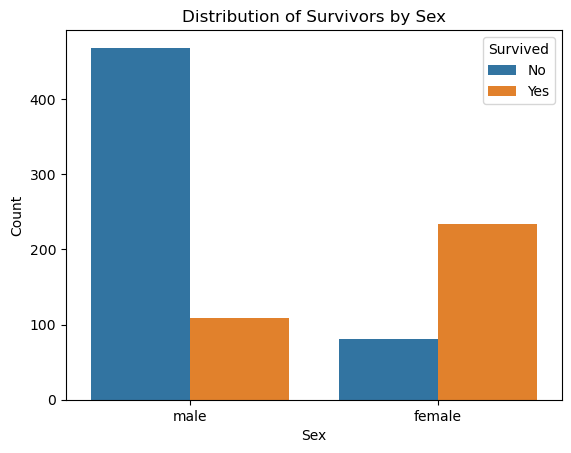

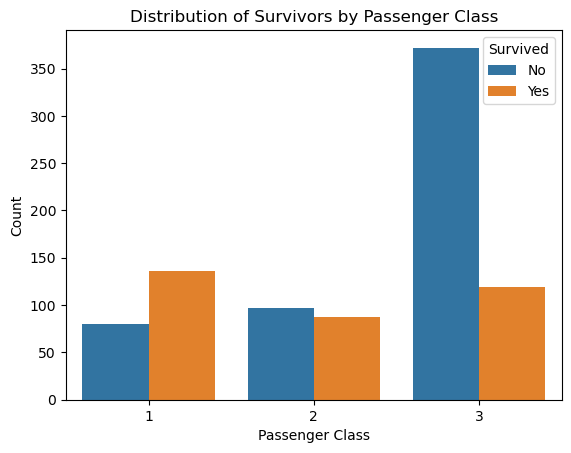

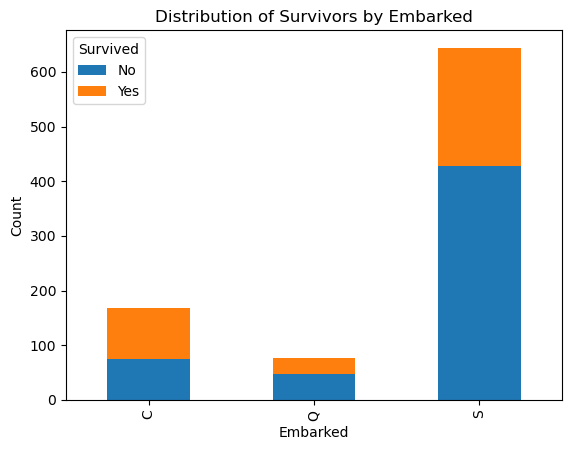

In [17]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Survivors by Sex')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

sns.countplot(x='Pclass', hue='Survived', data=df)
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Distribution of Survivors by Passenger Class')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

survival_by_embarked = df.groupby(['Embarked', 'Survived']).size().unstack()

survival_by_embarked.plot(kind='bar', stacked=True)
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Distribution of Survivors by Embarked')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

In [ ]:
TASK 2 - Classification/Regression
Perform following steps on the same dataset which you used for EDA.

Data Preprocessing (as per requirement)
Feature Engineering
Split dataset in train-test (80:20 ratio)
Model selection
Model training
Model evaluation
Fine-tune the Model
Make predictions
Summarize your model's performance by evaluation metrices

In [ ]:
DATA PREPROCESSING

In [145]:
counter = 0
r,c = original_df.shape

df1 = df.copy()
df1.drop_duplicates(inplace=True)
df1.reset_index(drop=True,inplace=True)

if df1.shape==(r,c):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped ---> {r-df1.shape[0]}')


Inference: The dataset doesn't have any duplicates


In [65]:
titanic_data = pd.read_csv('train.csv')

In [66]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [67]:
titanic_data['Embarked'].value_counts()

titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0


In [ ]:
SPLITING DATA

In [73]:
X = df.drop('Survived', axis=1)
Y = df['Survived']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

print(X.shape, X_train.shape, X_test.shape)


(418, 1) (334, 1) (84, 1)


In [ ]:
MODEL TRAINING

In [74]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [142]:
X = df.drop('Survived', axis=1)
y = df['Survived']  
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
MODEL EVALUATION AND PREDICTION

In [75]:
X_train_prediction = model.predict(X_train)
print(X_train_prediction)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


In [ ]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

In [76]:
X_test_prediction = model.predict(X_test)

In [77]:
print(X_test_prediction)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]


In [ ]:
FEATURE ENGINEERING

In [96]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [108]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [117]:
df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

df['Deck'] = train_df['Cabin'].str.extract('([A-Za-z])', expand=False)

df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'])

df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

X = df.drop('Survived', axis=1)
Y = df['Survived']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [ ]:
FINE TUNE

In [141]:
X = df.drop('Survived', axis=1)  
y = df['Survived']  
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_


Accuracy: 0.5952380952380952
